In [ ]:
"""
코드 실행 전 :::
dlib-19.19 file : https://pypi.org/project/dlib/
cmake 환경변수 추가
code : https://velog.io/@choiiis/Python%EC%97%90%EC%84%9C-dlib%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC-Facial-Landmark-%EA%B2%80%EC%B6%9C%ED%95%98%EC%97%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC-json-%EC%A0%80%EC%9E%A5%ED%95%98%EA%B8%B0
train data : http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
"""

In [ ]:
import dlib
import cv2
import numpy as np

# create list for landmarks
# 턱라인, 얼굴 전체, 좌우눈썹, 좌우눈, 코, 입술테두리/안 순서대로 쭉쭉 넣어주기
ALL = list(range(0, 68))
JAWLINE = list(range(0, 17))
RIGHT_EYEBROW = list(range(17, 22))
LEFT_EYEBROW = list(range(22, 27))
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
NOSE = list(range(27, 36))
MOUTH_OUTLINE = list(range(48, 61))
MOUTH_INNER = list(range(61, 68))


# create face detector, predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')


# create VideoCapture object (input the video)
# 1. 0 for web camera (실시간 얼굴 랜드마크 검출)
vid_in = cv2.VideoCapture(0)
# 2. "---" for the video file
#vid_in = cv2.VideoCapture("baby_vid.mp4")

# capture the image in an infinite loop -> make it looks like a video
while True:
    # Get frame from video
    # get success : ret = True / fail : ret= False
    ret, image_o = vid_in.read()

   # resize the video
    image = cv2.resize(image_o, dsize=(640, 480), interpolation=cv2.INTER_AREA)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get faces (up-sampling=1)
    face_detector = detector(img_gray, 1)
    # the number of face detected
    print("The number of faces detected : {}".format(len(face_detector)))

    # loop as the number of face
    # one loop belong to one face
    for face in face_detector:
        # face wrapped with rectangle (바운딩 박스 - 필요X면 지워도 ㄱㅊ)
        cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()),
                      (0, 0, 255), 3)

        # make prediction and transform to numpy array
        landmarks = predictor(image, face)  # 얼굴에서 68개 점 찾기

        #create list to contain landmarks
        landmark_list = []

        # append (x, y) in landmark_list
        for p in landmarks.parts():
            landmark_list.append([p.x, p.y])
            cv2.circle(image, (p.x, p.y), 2, (0, 255, 0), -1)


    cv2.imshow('result', image)

    # wait for keyboard input
    key = cv2.waitKey(1)

    # if esc,
    if key == 27:
        break

vid_in.release()

### 프레임당 68개 좌표 검출
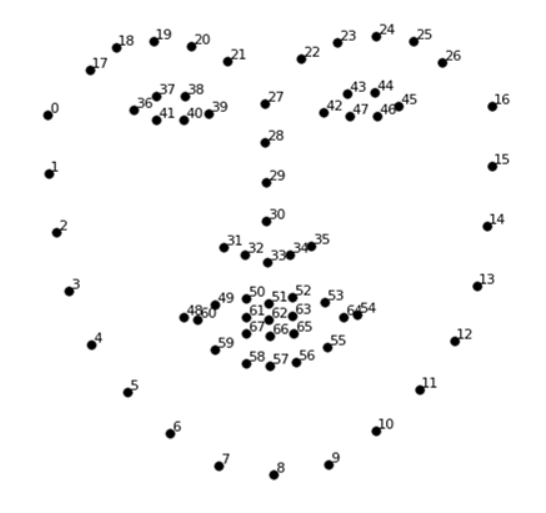

In [ ]:
# 1. json 
# 검출한 좌표값 -> dict -> json 저장

with open("test.json", "w") as json_file:
	key_val = [ALL, landmark_list]
	landmark_dict = dict(zip(*key_val))
	print(landmark_dict)
	json_file.write(json.dumps(landmark_dict))
	json_file.write('\n')

In [ ]:
# 3초짜리 영상 기준, 245 프레임 좌표값 저장

# 저장 형태
#{"0": [327, 202], "1": [327, 221], "2": [328, 239], "3": [331, 256], "4": [338, 274], "5": [349, 289], "6": [363, 302], "7": [379, 310], "8": [398, 313], "9": [415, 309], "10": [427, 300], "11": [437, 287], "12": [442, 271], "13": [446, 253], "14": [449, 237], "15": [452, 221], "16": [452, 204], "17": [346, 188], "18": [354, 180], "19": [366, 179], "20": [377, 181], "21": [388, 185], "22": [404, 184], "23": [414, 180], "24": [425, 179], "25": [435, 182], "26": [442, 190], "27": [396, 201], "28": [396, 211], "29": [397, 220], "30": [398, 231], "31": [385, 244], "32": [391, 246], "33": [398, 247], "34": [404, 245], "35": [409, 244], "36": [357, 204], "37": [364, 202], "38": [371, 203], "39": [378, 206], "40": [371, 207], "41": [364, 207], "42": [410, 205], "43": [417, 202], "44": [424, 202], "45": [431, 205], "46": [425, 207], "47": [418, 207], "48": [377, 270], "49": [384, 262], "50": [392, 258], "51": [398, 260], "52": [405, 258], "53": [412, 263], "54": [418, 270], "55": [412, 277], "56": [405, 281], "57": [398, 281], "58": [392, 281], "59": [384, 277], "60": [380, 269], "61": [392, 266], "62": [398, 266], "63": [405, 266], "64": [414, 270], "65": [405, 271], "66": [398, 271], "67": [392, 270]}
#{"0": [326, 198], "1": [326, 216], "2": [328, 234], "3": [331, 252], "4": [338, 269], "5": [348, 284], "6": [362, 296], "7": [378, 304], "8": [397, 307], "9": [415, 304], "10": [427, 294], "11": [436, 281], "12": [442, 265], "13": [446, 248], "14": [449, 232], "15": [453, 215], "16": [453, 198], "17": [344, 182], "18": [353, 175], "19": [365, 174], "20": [376, 177], "21": [387, 181], "22": [405, 180], "23": [415, 176], "24": [426, 174], "25": [436, 176], "26": [443, 183], "27": [396, 198], "28": [397, 207], "29": [398, 217], "30": [399, 226], "31": [385, 241], "32": [391, 241], "33": [398, 242], "34": [404, 241], "35": [410, 240], "36": [356, 201], "37": [363, 199], "38": [370, 199], "39": [377, 203], "40": [370, 204], "41": [362, 204], "42": [412, 202], "43": [419, 198], "44": [426, 198], "45": [433, 200], "46": [427, 203], "47": [419, 204], "48": [377, 266], "49": [385, 258], "50": [393, 253], "51": [399, 255], "52": [405, 253], "53": [412, 258], "54": [418, 266], "55": [412, 273], "56": [405, 277], "57": [399, 277], "58": [392, 277], "59": [385, 274], "60": [381, 266], "61": [393, 263], "62": [399, 263], "63": [405, 262], "64": [414, 266], "65": [405, 267], "66": [399, 267], "67": [393, 266]}
#{"0": [326, 201], "1": [326, 218], "2": [328, 236], "3": [331, 253], "4": [338, 270], "5": [349, 285], "6": [363, 296], "7": [379, 305], "8": [398, 308], "9": [416, 304], "10": [428, 294], "11": [437, 281], "12": [443, 265], "13": [446, 248], "14": [450, 233], "15": [452, 217], "16": [452, 201], "17": [345, 185], "18": [355, 179], "19": [366, 178], "20": [378, 180], "21": [389, 184], "22": [405, 183], "23": [416, 179], "24": [426, 178], "25": [436, 180], "26": [443, 186], "27": [397, 201], "28": [398, 211], "29": [399, 220], "30": [400, 230], "31": [386, 243], "32": [392, 244], "33": [399, 245], "34": [405, 244], "35": [411, 243], "36": [357, 204], "37": [364, 203], "38": [372, 203], "39": [378, 206], "40": [371, 208], "41": [364, 208], "42": [413, 206], "43": [419, 203], "44": [426, 203], "45": [433, 204], "46": [427, 207], "47": [420, 208], "48": [377, 269], "49": [385, 261], "50": [394, 256], "51": [399, 258], "52": [406, 257], "53": [413, 261], "54": [419, 268], "55": [413, 276], "56": [406, 280], "57": [399, 280], "58": [393, 280], "59": [385, 276], "60": [381, 268], "61": [394, 265], "62": [399, 266], "63": [405, 265], "64": [415, 268], "65": [406, 269], "66": [399, 269], "67": [393, 269]}
#{"0": [327, 203], "1": [326, 220], "2": [328, 238], "3": [331, 255], "4": [338, 271], "5": [349, 286], "6": [362, 298], "7": [379, 307], "8": [397, 310], "9": [414, 307], "10": [426, 297], "11": [435, 283], "12": [442, 268], "13": [446, 252], "14": [449, 236], "15": [452, 220], "16": [453, 205], "17": [346, 187], "18": [355, 181], "19": [367, 180], "20": [378, 183], "21": [388, 186], "22": [407, 186], "23": [417, 182], "24": [427, 181], "25": [437, 182], "26": [444, 189], "27": [398, 203], "28": [398, 213], "29": [399, 222], "30": [400, 232], "31": [386, 245], "32": [392, 246], "33": [399, 247], "34": [405, 246], "35": [411, 245], "36": [357, 206], "37": [365, 205], "38": [372, 205], "39": [379, 208], "40": [372, 210], "41": [364, 210], "42": [413, 208], "43": [420, 205], "44": [427, 205], "45": [433, 206], "46": [427, 210], "47": [420, 210], "48": [377, 270], "49": [385, 262], "50": [393, 258], "51": [399, 260], "52": [405, 258], "53": [413, 263], "54": [419, 270], "55": [413, 278], "56": [406, 281], "57": [399, 281], "58": [393, 281], "59": [384, 278], "60": [381, 270], "61": [393, 267], "62": [399, 267], "63": [405, 267], "64": [415, 270], "65": [405, 271], "66": [399, 271], "67": [393, 271]}

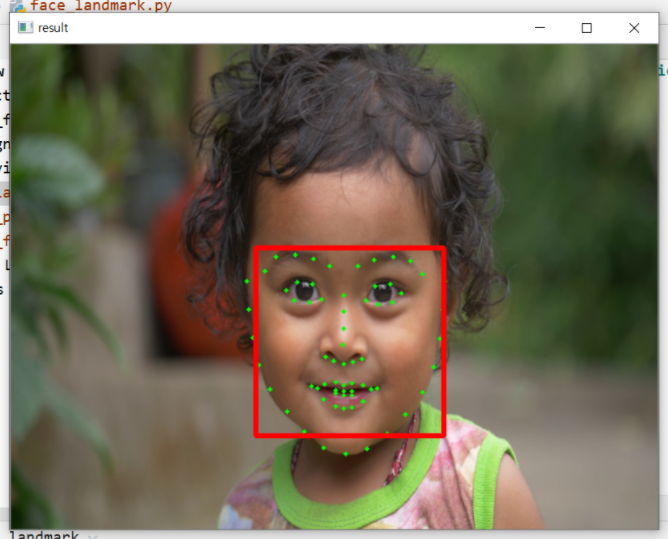